# Feyman's numerical solution of Newton's Laws

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$x(t + \epsilon) = x(t) + \epsilon v(t)$$
$$v(t + \epsilon) = v(t) + \epsilon a(t,x,v)$$

La aceleración puede depender de $t, x, v$. 
$$F = m \frac{dv}{dt}=m\frac{d^2x}{dt^2} = -kx$$

In [2]:
m = 1 
k = 1

t0 = 0
x0 = 1
v0 = 0

epsilon = 0.1

x1 = x0 + v0*epsilon
v1 = v0 - k/m*x0*epsilon

# imprimir el resultado
print(x1, v1)

1.0 -0.1


In [3]:
x2 = x1 + v1*epsilon
v2 = v1 - k/m*x1*epsilon

# imprimir el resultado
print(x2, v2)

0.99 -0.2


In [4]:
x3 = x2 + v2*epsilon
v3 = v2 - k/m*x2*epsilon

print(x3, v3)

0.97 -0.29900000000000004


In [5]:
x = [x0]
v = [v0]
N = 40
tf = t0 + N*epsilon

for i in range(0,N):
    x.append(x[i]+v[i]*epsilon)
    v.append(v[i]-k/m*x[i]*epsilon)

In [6]:
print(x)

[1, 1.0, 0.99, 0.97, 0.9400999999999999, 0.9005, 0.851499, 0.793493, 0.72697201, 0.65251609, 0.5707904498999999, 0.4825396488999999, 0.3885809434009999, 0.2897968414129999, 0.18712692999098987, 0.08155905015484986, -0.025880098981200042, -0.13413483861879844, -0.24213077726658483, -0.34878536752818323, -0.45301865001711583, -0.5537640788307666, -0.6499793211442462, -0.7406569226694181, -0.8248347309831475, -0.9016059700701828, -0.9701288618473867, -1.0296356939238887, -1.0794412373819167, -1.118950423900706, -1.147665198045676, -1.165190467951639, -1.171239085877145, -1.165635799123135, -1.1483201215103533, -1.1193480859063403, -1.0788928490872238, -1.027244131409044, -0.9648064852399918, -0.8920963977568492, -0.8097382454213067]


In [7]:
print(v)

[0, -0.1, -0.2, -0.29900000000000004, -0.396, -0.49001, -0.58006, -0.6652099, -0.7445592000000001, -0.8172564010000001, -0.8825080100000001, -0.9395870549900001, -0.9878410198800001, -1.0266991142201, -1.0556787983614, -1.074391491360499, -1.082547396375984, -1.079959386477864, -1.0665459026159843, -1.0423328248893258, -1.0074542881365074, -0.9621524231347958, -0.9067760152517191, -0.8417780831372945, -0.7677123908703527, -0.685228917772038, -0.5950683207650197, -0.498055434580281, -0.39509186518789213, -0.28714774144970046, -0.17525269905962987, -0.060486179255062264, 0.05603286754010163, 0.17315677612781616, 0.2897203560401297, 0.404552368191165, 0.5164871767817991, 0.6243764616905215, 0.7271008748314259, 0.8235815233554251, 0.9127911631311101]


In [8]:
time = np.arange(t0, tf+epsilon, epsilon)

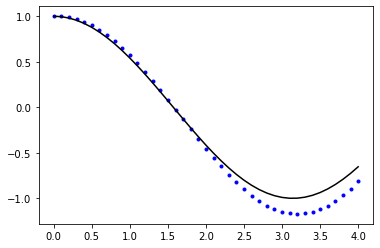

In [9]:
plt.figure()
plt.plot(time, x, 'b.')
plt.plot(time, np.cos(time), 'k')
plt.savefig('./plots/oscilador.pdf', bbox_inches='tight')
plt.show()

## Improvements
$$x(t+\epsilon) = x(t) + \epsilon v(t+\epsilon/2) $$
$$v(t+\epsilon/2) = v(t-\epsilon/2) + \epsilon a(t)$$

$$a(t) = -x(t)$$

In [147]:
m = 1 
k = 1


t0 = 0
epsilon = 0.1

x0 = 1
a0 = -k/m*x0
v0 = 0
v1_2 = v0 + epsilon/2*a0


x_imp = [x0]
v_imp = [v1_2]

N = 40
tf = t0 + N*epsilon
time_imp = np.arange(t0, tf+epsilon, epsilon)

In [148]:
for i in range(0,N):
    x_imp.append(x_imp[i]+v_imp[i]*epsilon)
    v_imp.append(v_imp[i]-k/m*x_imp[i]*epsilon)

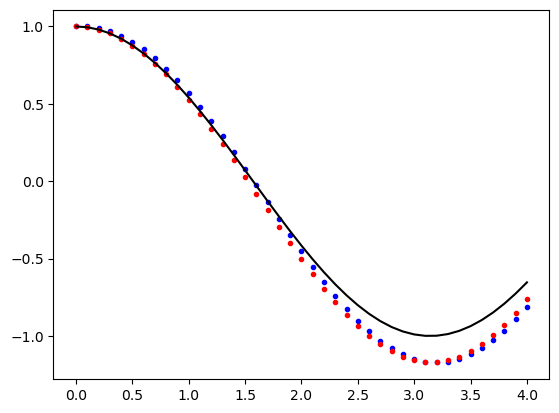

In [149]:
plt.figure()
plt.plot(time, x, 'b.')
plt.plot(time_imp, x_imp, 'r.')
plt.plot(time_imp, np.cos(time_imp), 'k')
#plt.plot(time, v)
plt.show()

## Utilizando scipy

In [150]:
from scipy.integrate import ode

In [ ]:
def rhs_oscillator(t, X, m, k):
    x, v
    dx_dt = v
    dv_dt = -k/m*x
    return [dx_dt, dv_dt]